C:\Users\Miko\AppData\Local\Temp\ipykernel_20792\604118633.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


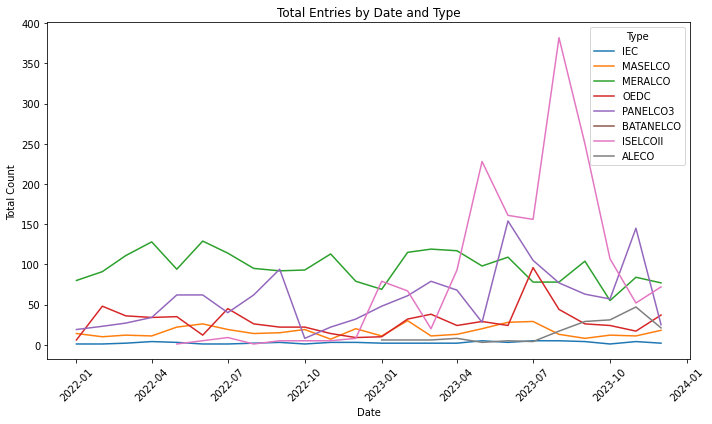

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime({
    'year': df['date'].dt.year,
    'month': df['date'].dt.month,
    'day': 1
})

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
for dtype in aggregated_data['type'].unique():
    subset = aggregated_data[aggregated_data['type'] == dtype]
    # plt.scatter(subset['date'], subset['count'], label=dtype)
    plt.plot(subset['date'], subset['count'], label=dtype)

plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Entries by Date and Type')
plt.legend(title='Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

C:\Users\Miko\AppData\Local\Temp\ipykernel_20792\1007685709.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


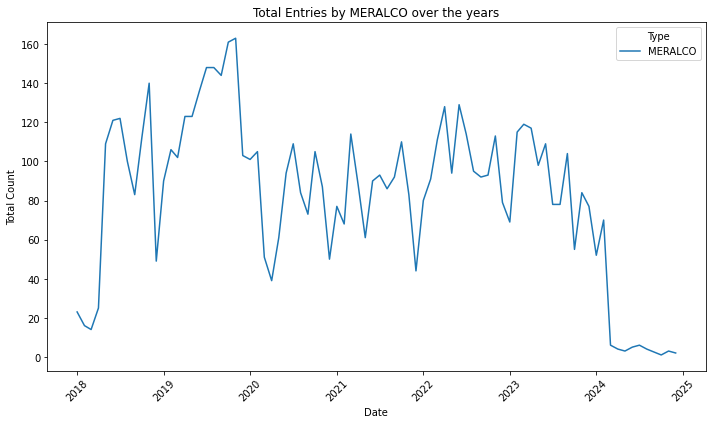

In [36]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime({
    'year': df['date'].dt.year,
    'month': df['date'].dt.month,
    'day': 1
})

df = df[(df['type'] == 'MERALCO')]

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date']).size().reset_index(name='count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
# plt.scatter(aggregated_data['date'], aggregated_data['count'], label='MERALCO')
plt.plot(aggregated_data['date'], aggregated_data['count'], label='MERALCO')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Entries by MERALCO over the years')
plt.legend(title='Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

C:\Users\Miko\AppData\Local\Temp\ipykernel_20792\686028822.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


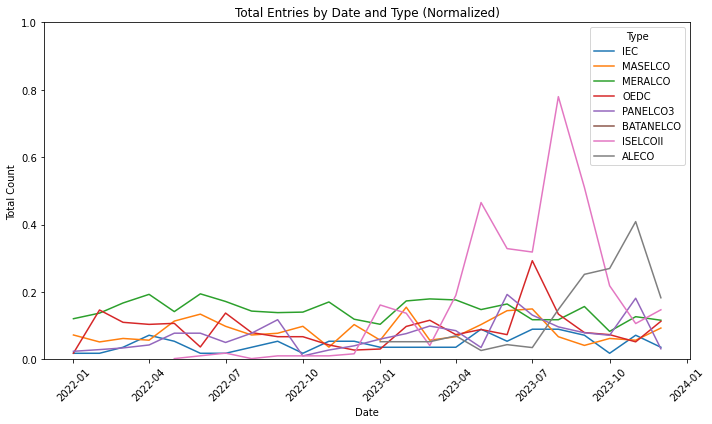

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime({
    'year': df['date'].dt.year,
    'month': df['date'].dt.month,
    'day': 1
})

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
unique_locations_per_type = df.groupby('type')['location'].nunique()
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')
aggregated_data['normalized_count'] = aggregated_data.apply(
    lambda row: row['count'] / unique_locations_per_type[row['type']], axis=1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for dtype in aggregated_data['type'].unique():
    subset = aggregated_data[aggregated_data['type'] == dtype]
    # plt.scatter(subset['date'], subset['normalized_count'], label=dtype)
    plt.plot(subset['date'], subset['normalized_count'], label=dtype)

plt.xlabel('Date')
plt.ylabel('Total Count')
plt.ylim(0, 1.0)
plt.title('Total Entries by Date and Type (Normalized)')
plt.legend(title='Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')
aggregated_data['has_brownout'] = aggregated_data.apply(
    lambda row: 1 if row['count'] else 0, axis=1)

# Create a scatter plot
for dtype in aggregated_data['type'].unique():
    continue
    plt.figure(figsize=(10, 6))
    subset = aggregated_data[aggregated_data['type'] == dtype]
    plt.scatter(subset['date'], subset['has_brownout'], label=dtype)

    plt.xlabel('Date')
    plt.ylabel('Normalized Count per Unique Location')
    plt.title(f'If has scheduled power interruption announcement for Type: {dtype} (2022-2023)')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.legend(title='Type')
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()

C:\Users\Miko\AppData\Local\Temp\ipykernel_20792\3695882262.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


C:\Users\Miko\AppData\Local\Temp\ipykernel_20792\1938842496.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


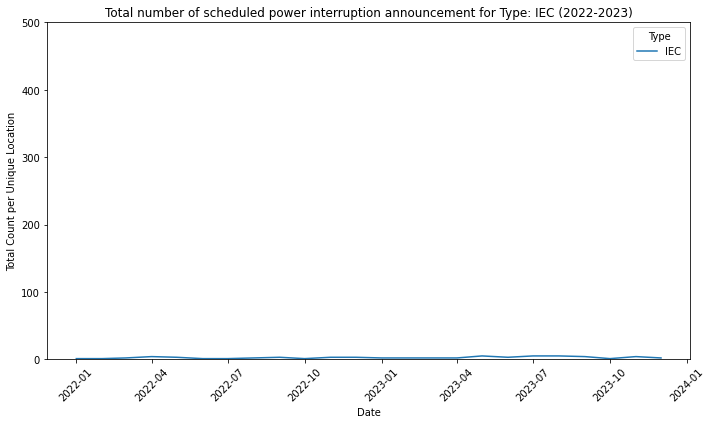

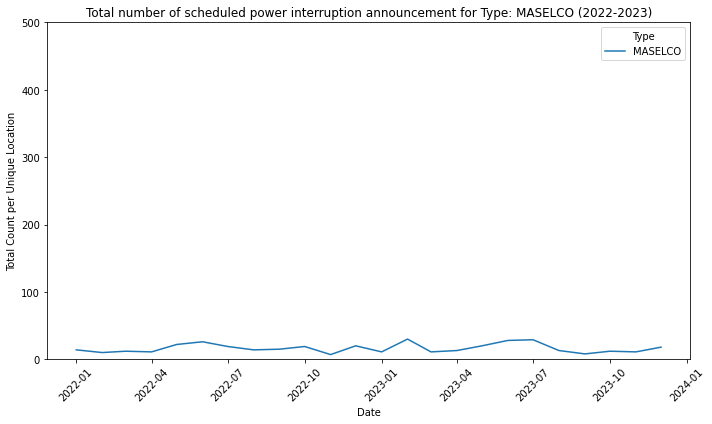

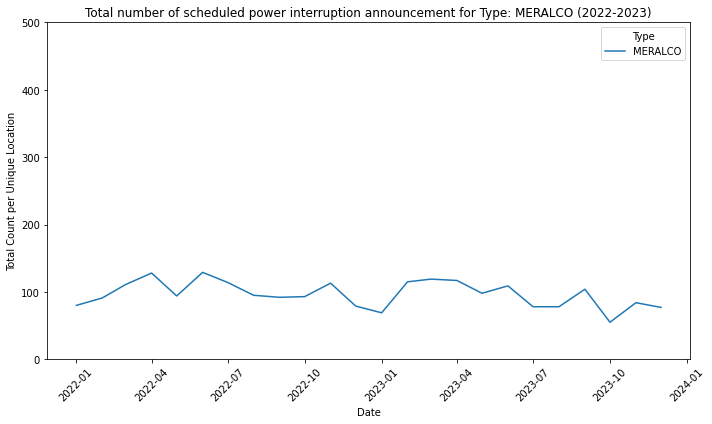

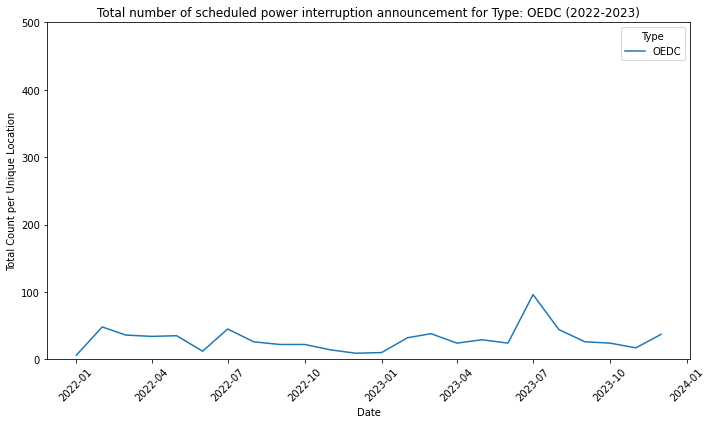

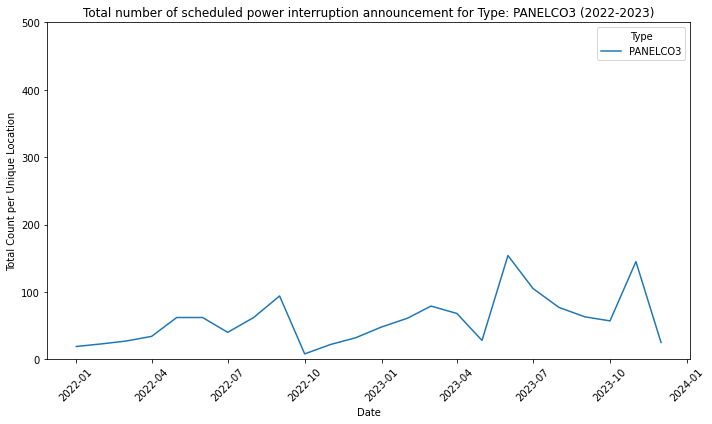

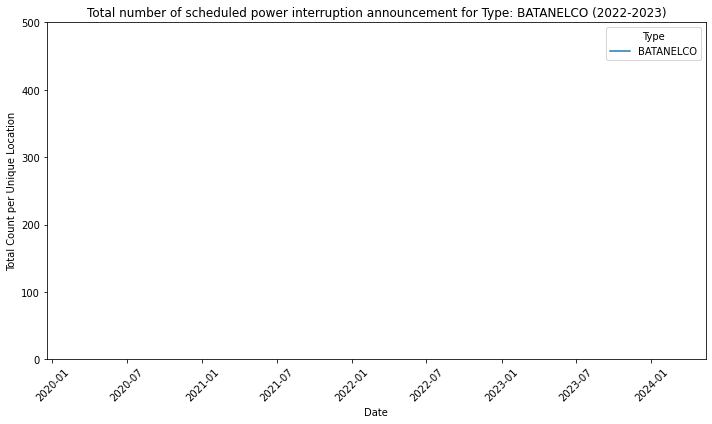

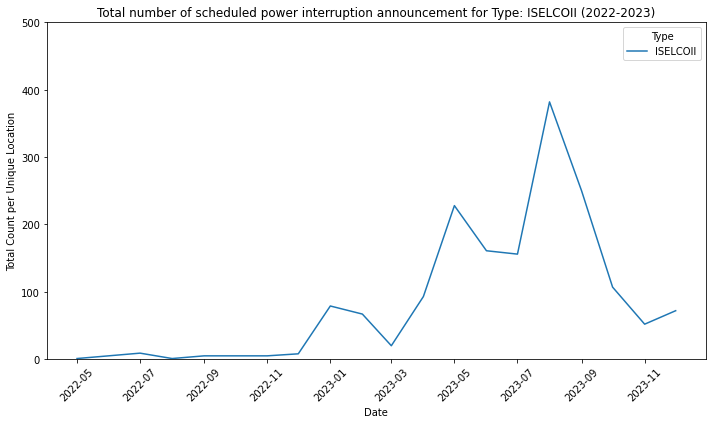

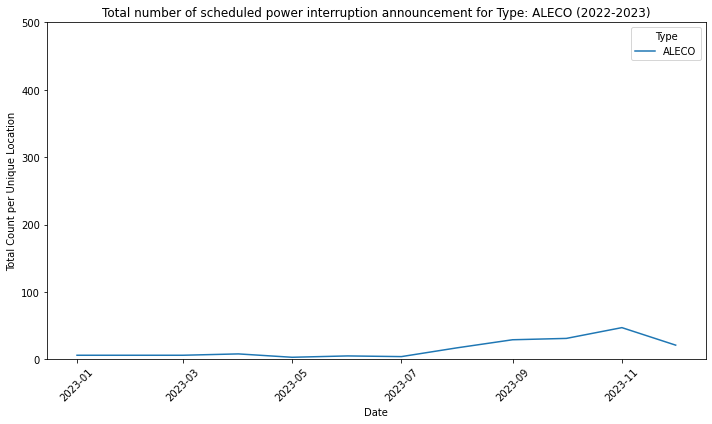

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime({
    'year': df['date'].dt.year,
    'month': df['date'].dt.month,
    'day': 1
})

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')

# Create a scatter plot
for dtype in aggregated_data['type'].unique():
    plt.figure(figsize=(10, 6))
    subset = aggregated_data[aggregated_data['type'] == dtype]
    # plt.scatter(subset['date'], subset['count'], label=dtype)
    plt.plot(subset['date'], subset['count'], label=dtype)

    plt.xlabel('Date')
    plt.ylabel('Total Count per Unique Location')
    plt.ylim(0, 500)
    plt.title(f'Total number of scheduled power interruption announcement for Type: {dtype} (2022-2023)')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.legend(title='Type')
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()

C:\Users\Miko\AppData\Local\Temp\ipykernel_20792\3407998266.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


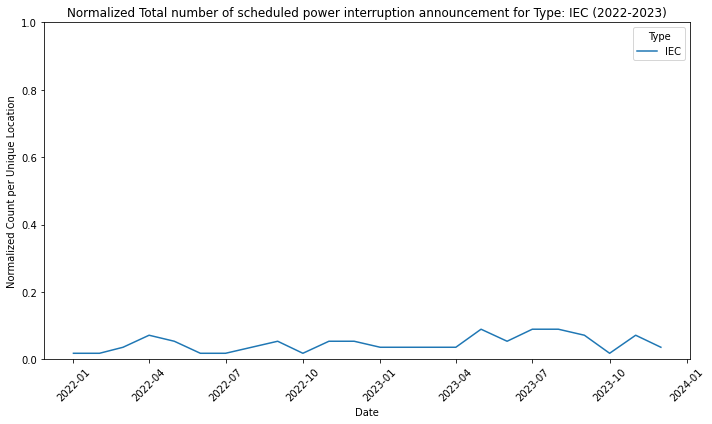

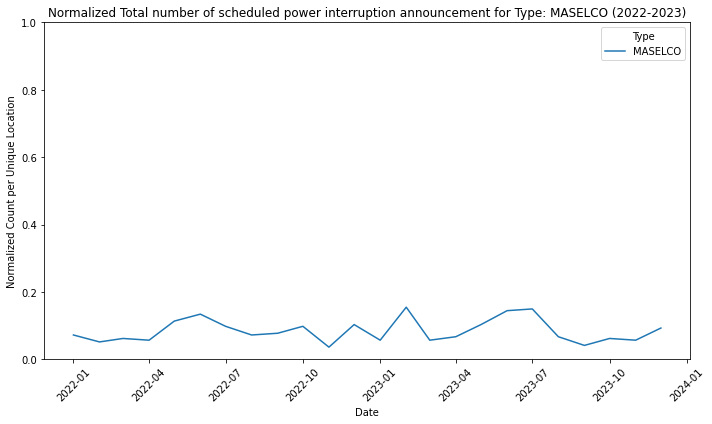

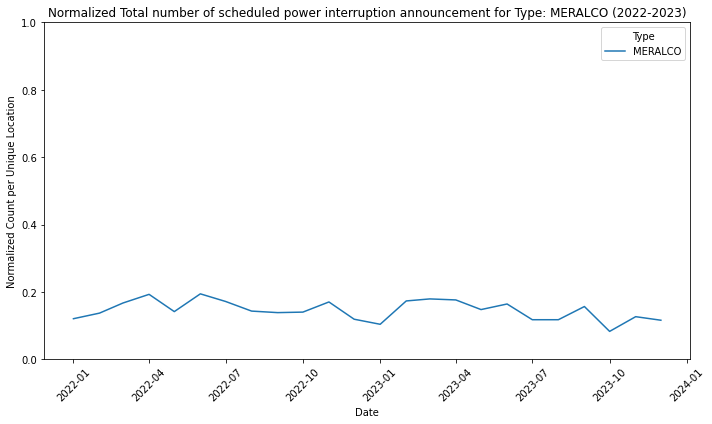

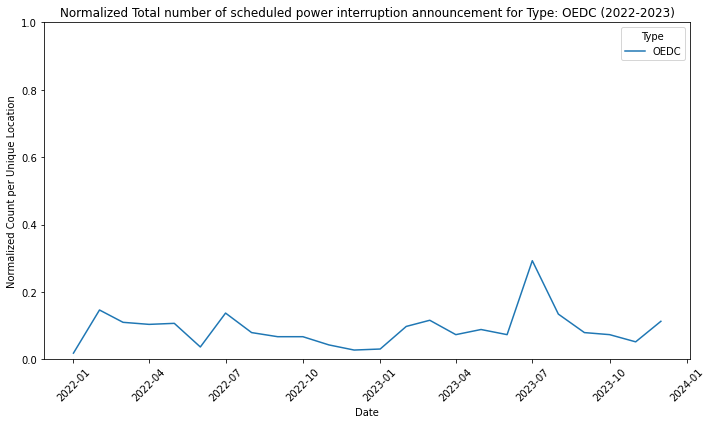

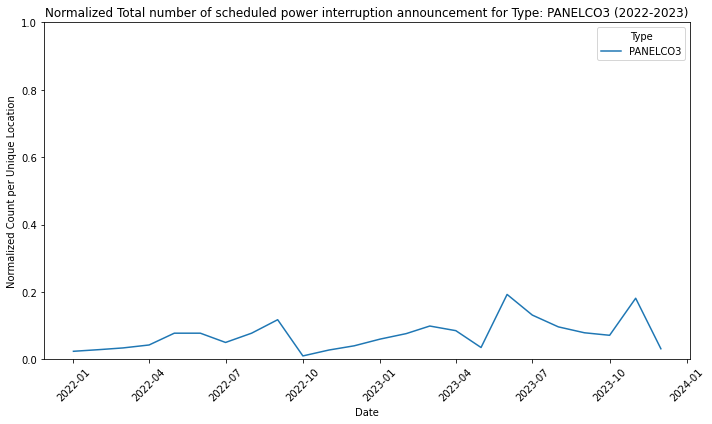

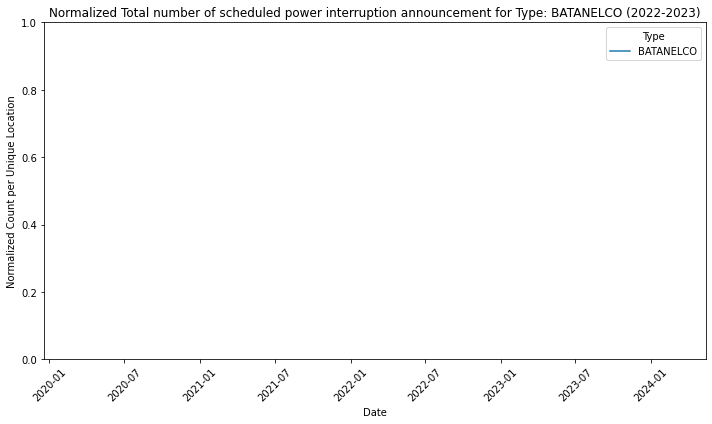

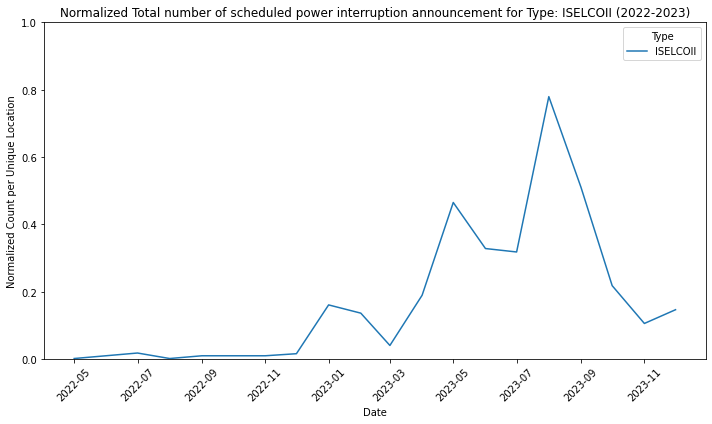

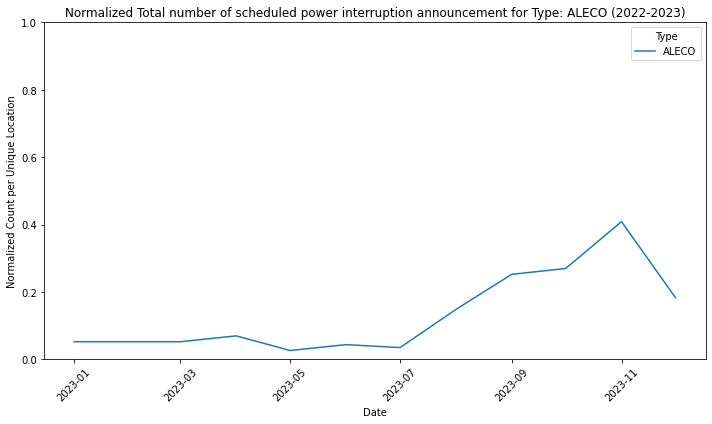

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime({
    'year': df['date'].dt.year,
    'month': df['date'].dt.month,
    'day': 1
})

# Filter data for dates within 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Aggregate data by date and type, counting entries
unique_locations_per_type = df.groupby('type')['location'].nunique()
aggregated_data = df.groupby(['date', 'type']).size().reset_index(name='count')
aggregated_data['normalized_count'] = aggregated_data.apply(
    lambda row: row['count'] / unique_locations_per_type[row['type']], axis=1)

# Create a scatter plot
for dtype in aggregated_data['type'].unique():
    plt.figure(figsize=(10, 6))
    subset = aggregated_data[aggregated_data['type'] == dtype]
    # plt.scatter(subset['date'], subset['normalized_count'], label=dtype)
    plt.plot(subset['date'], subset['normalized_count'], label=dtype)

    plt.xlabel('Date')
    plt.ylabel('Normalized Count per Unique Location')
    plt.ylim(0, 1.0)
    plt.title(f'Normalized Total number of scheduled power interruption announcement for Type: {dtype} (2022-2023)')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.legend(title='Type')
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()